# **Cron** - не будет работать, если СЕРВЕР/ПК/НОУТБУК не будет запущен

- [Видео](https://youtu.be/tbVKyCr-gRQ?si=vqNlr7-7GO0465YB)

**Краткая инфа из видео:**
1) `cron.allow` - файл, где находятся список пользователей, которым разрешен доступ
2) `cron.deny` - файл, где находятся список пользователей, которым запрещен доступ
3) 2 режима cron: 
- Выполняемые пользователем
- Выполняемые системой

*Примечание:* Фай `crontab` управляет всей программой CRON 

Содержание файоа `crontab`:

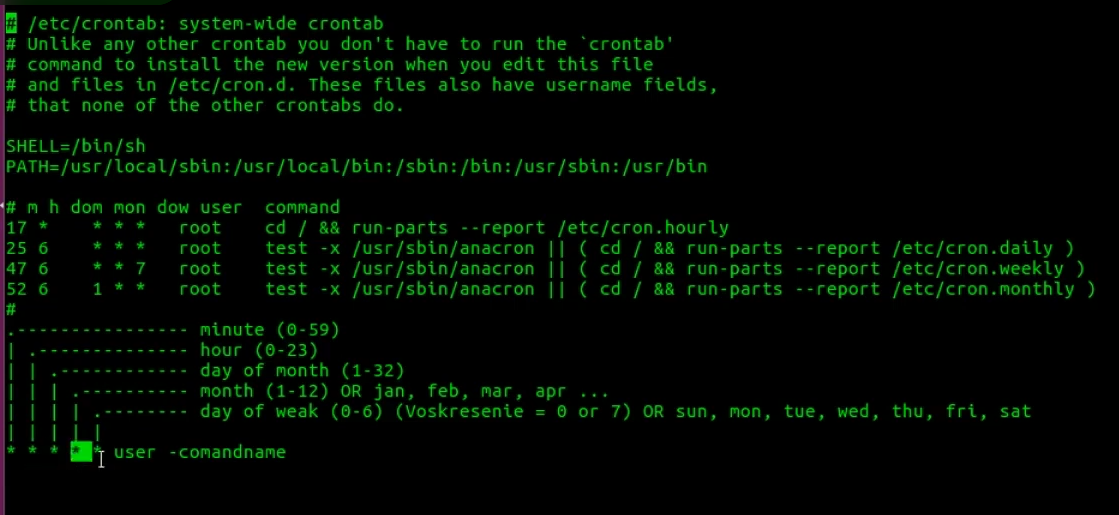

## Как это рабоатет?

Нужно ввести в одну строку:
1) *- минуты
2) *- часы
3) *- дни
4) *- месяцы
5) *- дни недели
6) пользователь
7) КОМАНДА которую нужно выполнить

*- это означает, что каждую минуту, каждый час, каждый день и т.д... 
Можно ввести: 
*/5 - это задает интервал, например: каждые 5 минут. Например */2 в поле час означает, что команда выполниться в 2 часа дня, в 4 часа дня и т.д.
13-15 - это конкретный интервал, с 13 часов по 15 часов выполнение команды этим пользователем (если 13-15 стоит в поле часы)
13, 15 - это означает 13 и 15

4) также есть папки cron.daily / cron.hourly и т.д. - которые когорят о том, что файл, который будет помещен в них будет выполняться ежедневно / каждый час и т.д.

5) Пользовательский режим крон - это режим, который позволяет какому-либо пользователю задавать свои параметры cron. И это будет отличенно от системного режима cron

`crontab -e` - нужно ввести для входа в этот режим(видимо)

Туда нужно ввести команду CRON со *-ками

Дальше сохранить это все и в терминале выдаст сообщение о том что создан новый crontab

Чтобы увидеть этот crontab нужно перейти в `/var/spool/cron/crontabs/`
Где будет написан имя пользователя, который его создал.
Чтобы сменить пользователя... Нужно ввести `su ИМЯ ПОЛЬЗОВАТЕЛЯ`

`tail -f /var/log/syslogs` - показывает логи от cron


- [Полезный источник](https://habr.com/ru/companies/badoo/articles/468061/)

Строки из этого источника:

1) Сron-ы поставляются комплектом из двух программ: постоянно работающего демона cron и доступной пользователям утилиты crontab. Последняя позволяет редактировать таблицы задач, специфичные для каждого пользователя в системе, демон же запускает задачи из пользовательских и системной таблиц.

2) Вызовом утилиты crontab можно сделать четыре вещи:

    - `crontab -e` # редактировать таблицу задач
    - `crontab -l` # показать таблицу задач
    - `crontab -r` # удалить таблицу задач
    - `crontab path/to/file.crontab` # загрузить таблицу задач из файла

[Описание задач в следующем формате](https://habr.com/ru/companies/badoo/articles/468061/#:~:text=%D0%A1%D0%B0%D0%BC%D0%B8%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8%20%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D1%8B%20%D0%B2%20%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D1%8E%D1%89%D0%B5%D0%BC%20%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%D0%B5%3A,9%20*%20*%20*%20*%20/path/to/exec%20%2Da%20%2Db%20%2Dc)

3) Доступ пользователей к планированию задач регулируется в POSIX файлам cron.allow и cron.deny в которых перечисляются, соответственно, пользователи с доступом к crontab и пользователи без доступа к программе.

4) Таблица задач суперпользователя расположена в `/etc/crontab`. 
[Синтаксис системной таблицы соответствует синтаксису Vixie cron](https://habr.com/ru/companies/badoo/articles/468061/#:~:text=%D0%A1%D0%B8%D0%BD%D1%82%D0%B0%D0%BA%D1%81%D0%B8%D1%81%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%BD%D0%BE%D0%B9%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B%20%D1%81%D0%BE%D0%BE%D1%82%D0%B2%D0%B5%D1%82%D1%81%D1%82%D0%B2%D1%83%D0%B5%D1%82%20%D1%81%D0%B8%D0%BD%D1%82%D0%B0%D0%BA%D1%81%D0%B8%D1%81%D1%83)

5) Таблицы задач обычных пользователей располагаются в `/var/cron/tabs/username` и используют общий синтаксис.

6) Управление списками пользователей, имеющих доступ к crontab, происходит в файлах `/var/cron/allow` и `/var/cron/deny`, куда достаточно внести имя пользователя отдельной строкой.

7) Расширенный синтаксис в ПолаВикси
    - можно указывать дни недели или месяцы поимённо:
    - Можно указывать шаг:
    - И т.д
```
# Запускается ежеминутно по понедельникам и вторникам в январе
* * * Jan Mon,Tue /path/to/exec
# Запускается с шагом в две минуты
*/2 * * * Mon,Tue /path/to/exec
```
8) Поддерживаются интуитивные альтернативы обычному синтаксису (reboot, yearly, annually, monthly, weekly, daily, midnight, hourly):

```
# Запускается после перезагрузки системы
@reboot /exec/on/reboot
# Запускается раз в день
@daily /exec/daily
# Запускается раз в час
@hourly /exec/daily
```
9) [Информация про переменные окружения](https://habr.com/ru/companies/badoo/articles/468061/#:~:text=%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%B5%D0%BC%D1%8B%D1%85%20%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.-,%D0%9F%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F,-USER%2C%20LOGNAME%20%D0%B8)


10) [Про cron в Debian и Ubuntu](https://habr.com/ru/companies/badoo/articles/468061/#:~:text=%D0%9F%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B5%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B%20%D0%B2%20Debian%20%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%BB%D0%B0%D0%B3%D0%B0%D1%8E%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%B4%D0%B8%D1%80%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8%D0%B8%20/var/spool/cron/crontabs%2C%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%D1%81%D1%91%20%D1%82%D0%B0%D0%BC%20%D0%B6%D0%B5%20%E2%80%94%20%D0%B2%20/etc/crontab.)
